In [ ]:
!pip install fredapi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = '9a1273b1081a318b066aa2673e228cf8'

In [ ]:
# Create the Fred object

fred = Fred(api_key=fred_key)

In [ ]:
# Search for economic data

sp_search = fred.search('S&P', order_by='popularity')

In [ ]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-12-01,2023-12-01,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-11-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-12-01 09:00:02-06:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-12-01,2023-12-01,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-11-28 08:12:02-06:00,89,"For more information regarding the index, plea..."
SP500,SP500,2023-12-01,2023-12-01,S&P 500,2013-12-02,2023-11-30,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-30 19:11:00-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-12-01,2023-12-01,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-11-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-12-01 09:00:07-06:00,83,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2023-12-01,2023-12-01,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...


<Axes: title={'center': 'S&P 500'}>

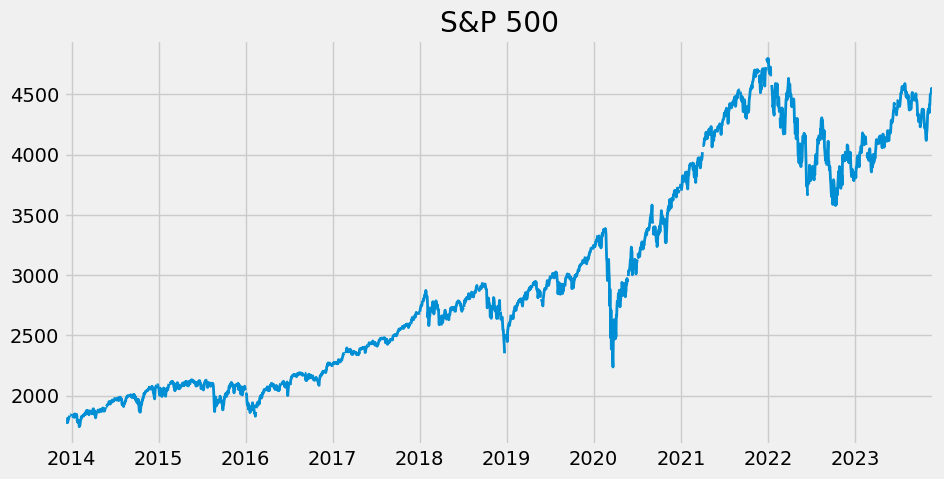

In [ ]:
# Pull raw data & plot

sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title = 'S&P 500', lw=2)

In [ ]:
# Pull and Join Multiple Data Series

unem_df = fred.search('unemployment rate state', filter =('frequency','Monthly'))
unem_df = unem_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unem_df = unem_df.loc[unem_df['title'].str.contains('Unemployment Rate in')]

In [ ]:
unem_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-12-01,2023-12-01,Unemployment Rate in California,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:19:01-06:00,64,None
NYUR,NYUR,2023-12-01,2023-12-01,Unemployment Rate in New York,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:19:02-06:00,53,None
TXUR,TXUR,2023-12-01,2023-12-01,Unemployment Rate in Texas,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:18:03-06:00,53,None
FLUR,FLUR,2023-12-01,2023-12-01,Unemployment Rate in Florida,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:19:03-06:00,50,None
ALUR,ALUR,2023-12-01,2023-12-01,Unemployment Rate in Alabama,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:19:03-06:00,37,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CWSTUR,CWSTUR,2023-12-01,2023-12-01,Unemployment Rate in West Census Region,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:18:13-06:00,8,None
CNEWUR,CNEWUR,2023-12-01,2023-12-01,Unemployment Rate in New England Census Division,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:18:12-06:00,7,None
CSOUUR,CSOUUR,2023-12-01,2023-12-01,Unemployment Rate in South Census Region,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:18:11-06:00,6,None


In [ ]:
all_results = []

for myid in unem_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)
unem_results = pd.concat(all_results, axis=1).drop(['LASMT261982000000003', 'LASMT391746000000003', 'CMWRUR', 'CNERUR', 'CWSTUR', 'CNEWUR', 'CSOUUR', 'CMTNUR', 'CENCUR', 'PRUR'], axis=1)

In [ ]:
unem_results

,CAUR,NYUR,TXUR,FLUR,ALUR,ILUR,OHUR,MIUR,NCUR,PAUR,MAUR,GAUR,COUR,NJUR,MNUR,KYUR,WIUR,NMUR,TNUR,VAUR,ORUR,IAUR,MDUR,AZUR,ARUR,WAUR,UTUR,INUR,AKUR,SCUR,WVUR,NVUR,LAUR,MOUR,OKUR,NDUR,MTUR,HIUR,NEUR,IDUR,NHUR,CTUR,DCUR,KSUR,WYUR,MEUR,MSUR,DEUR,SDUR,RIUR,VTUR
1976-01-01,9.2,10.3,5.8,9.7,6.6,6.6,8.1,9.9,6.4,8.0,10.5,8.4,5.8,10.3,6.0,5.6,5.8,8.6,6.0,6.1,9.5,4.3,6.4,10.2,7.3,8.5,5.8,6.6,7.1,7.4,7.5,9.2,6.3,5.9,5.8,3.4,5.8,9.8,3.3,5.6,6.5,9.8,8.7,4.2,4.1,8.7,6.7,8.0,3.3,7.8,8.6
1976-02-01,9.2,10.3,5.8,9.7,6.6,6.6,8.1,9.9,6.4,8.1,10.5,8.4,5.7,10.3,6.0,5.6,5.8,8.7,6.0,6.1,9.5,4.3,6.4,10.2,7.3,8.5,5.9,6.6,7.1,7.4,7.5,9.2,6.3,5.9,5.8,3.4,5.8,9.8,3.3,5.6,6.5,9.8,8.7,4.2,4.1,8.7,6.7,8.0,3.3,7.8,8.6
1976-03-01,9.1,10.2,5.9,9.6,6.6,6.6,8.1,9.9,6.4,8.1,10.5,8.4,5.7,10.3,5.9,5.6,5.7,8.7,6.0,6.1,9.4,4.3,6.4,10.1,7.3,8.4,5.8,6.5,7.0,7.3,7.5,9.2,6.3,5.9,5.8,3.4,5.8,9.8,3.3,5.6,6.5,9.8,8.6,4.2,4.1,8.6,6.6,8.0,3.2,7.7,8.6
1976-04-01,9.1,10.2,5.9,9.5,6.5,6.6,8.0,9.8,6.3,8.1,10.3,8.3,5.6,10.3,5.8,5.6,5.6,8.6,6.0,6.0,9.2,4.2,6.4,10.0,7.2,8.5,5.8,6.3,6.9,7.2,7.5,9.0,6.4,6.0,5.8,3.5,5.8,9.7,3.2,5.6,6.5,9.6,8.5,4.2,4.0,8.6,6.4,8.1,3.1,7.7,8.6
1976-05-01,9.0,10.1,5.9,9.3,6.4,6.6,7.8,9.6,6.1,8.1,10.1,8.1,5.6,10.3,5.7,5.5,5.5,8.6,5.9,5.9,9.1,4.1,6.5,9.8,7.1,8.5,5.7,6.0,6.9,7.0,7.4,8.9,6.5,6.0,5.7,3.6,5.8,9.4,3.1,5.6,6.5,9.4,8.4,4.2,3.9,8.5,6.3,8.3,3.1,7.7,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,4.6,3.9,4.1,2.6,2.2,4.0,3.4,3.6,3.3,3.8,2.6,3.2,2.8,3.7,2.9,3.8,2.5,3.5,3.2,2.7,3.5,2.7,2.0,3.5,2.6,3.8,2.4,3.2,3.7,3.1,3.3,5.4,3.6,2.6,2.7,2.0,2.4,3.0,1.9,2.7,1.8,3.7,5.1,2.8,3.1,2.4,3.1,4.2,1.8,2.9,1.9
2023-07-01,4.6,3.9,4.1,2.7,2.1,4.0,3.3,3.6,3.3,3.5,2.5,3.2,2.9,3.9,3.0,3.9,2.6,3.6,3.1,2.5,3.4,2.7,1.8,3.6,2.6,3.6,2.4,3.3,3.8,3.1,3.4,5.3,3.4,2.7,2.7,2.0,2.5,2.8,2.0,2.8,1.7,3.6,5.0,2.7,3.0,2.4,3.0,4.1,1.9,2.8,1.8
2023-08-01,4.6,3.9,4.1,2.7,2.1,4.1,3.4,3.7,3.3,3.5,2.6,3.3,3.1,4.2,3.1,4.0,2.9,3.7,3.1,2.5,3.4,2.9,1.7,3.8,2.7,3.6,2.5,3.4,3.9,3.0,3.6,5.4,3.3,2.8,2.8,1.9,2.5,2.8,2.0,3.0,1.8,3.5,5.0,2.7,2.9,2.5,3.2,4.1,1.9,2.7,1.8
2023-09-01,4.7,4.0,4.1,2.8,2.2,4.4,3.4,3.9,3.4,3.4,2.6,3.4,3.2,4.4,3.1,4.1,3.1,3.7,3.2,2.5,3.5,3.0,1.6,4.0,2.9,3.6,2.6,3.6,4.1,2.9,3.8,5.4,3.3,2.9,3.0,1.9,2.7,2.8,2.1,3.1,2.0,3.5,5.0,2.8,2.9,2.7,3.2,4.1,1.9,2.6,1.9


In [ ]:
#Plot states unemployment rate
px.line(unem_results)

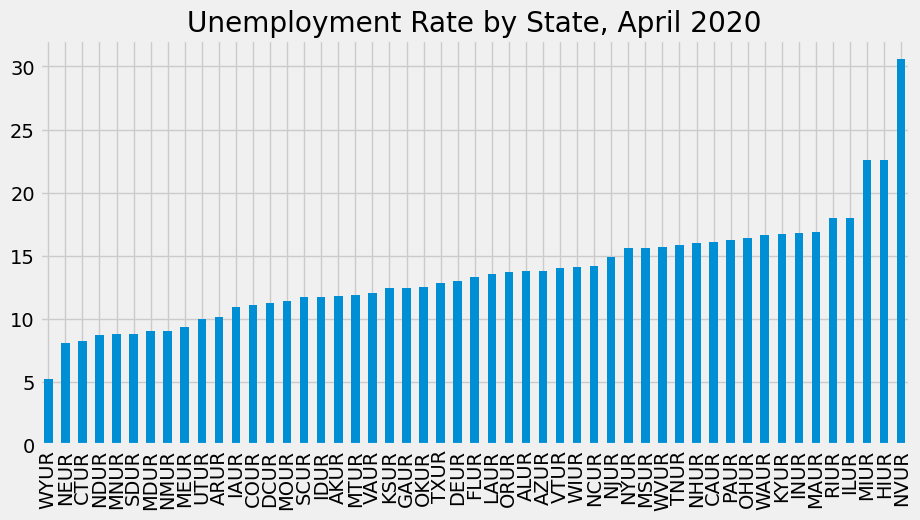

In [ ]:
#Pull April 2020 Unemployment Rate Per State
ax = unem_results.loc[unem_results.index == '2020-04-01'].T \
.sort_values('2020-04-01') \
.plot(kind='bar', figsize=(10,5), title='Unemployment Rate by State, April 2020')
ax.legend().remove()
plt.show()

In [ ]:
id_to_state= unem_df['title'].str.replace('Unemployment Rate in','').to_dict()

In [ ]:
unem_results.columns = [id_to_state[c] for c in unem_results.columns]

In [ ]:
unem_results

,California,New York,Texas,Florida,Alabama,Illinois,Ohio,Michigan,North Carolina,Pennsylvania,Massachusetts,Georgia,Colorado,New Jersey,Minnesota,Kentucky,Wisconsin,New Mexico,Tennessee,Virginia,Oregon,Iowa,Maryland,Arizona,Arkansas,Washington,Utah,Indiana,Alaska,South Carolina,West Virginia,Nevada,Louisiana,Missouri,Oklahoma,North Dakota,Montana,Hawaii,Nebraska,Idaho,New Hampshire,Connecticut,the District of Columbia,Kansas,Wyoming,Maine,Mississippi,Delaware,South Dakota,Rhode Island,Vermont
1976-01-01,9.2,10.3,5.8,9.7,6.6,6.6,8.1,9.9,6.4,8.0,10.5,8.4,5.8,10.3,6.0,5.6,5.8,8.6,6.0,6.1,9.5,4.3,6.4,10.2,7.3,8.5,5.8,6.6,7.1,7.4,7.5,9.2,6.3,5.9,5.8,3.4,5.8,9.8,3.3,5.6,6.5,9.8,8.7,4.2,4.1,8.7,6.7,8.0,3.3,7.8,8.6
1976-02-01,9.2,10.3,5.8,9.7,6.6,6.6,8.1,9.9,6.4,8.1,10.5,8.4,5.7,10.3,6.0,5.6,5.8,8.7,6.0,6.1,9.5,4.3,6.4,10.2,7.3,8.5,5.9,6.6,7.1,7.4,7.5,9.2,6.3,5.9,5.8,3.4,5.8,9.8,3.3,5.6,6.5,9.8,8.7,4.2,4.1,8.7,6.7,8.0,3.3,7.8,8.6
1976-03-01,9.1,10.2,5.9,9.6,6.6,6.6,8.1,9.9,6.4,8.1,10.5,8.4,5.7,10.3,5.9,5.6,5.7,8.7,6.0,6.1,9.4,4.3,6.4,10.1,7.3,8.4,5.8,6.5,7.0,7.3,7.5,9.2,6.3,5.9,5.8,3.4,5.8,9.8,3.3,5.6,6.5,9.8,8.6,4.2,4.1,8.6,6.6,8.0,3.2,7.7,8.6
1976-04-01,9.1,10.2,5.9,9.5,6.5,6.6,8.0,9.8,6.3,8.1,10.3,8.3,5.6,10.3,5.8,5.6,5.6,8.6,6.0,6.0,9.2,4.2,6.4,10.0,7.2,8.5,5.8,6.3,6.9,7.2,7.5,9.0,6.4,6.0,5.8,3.5,5.8,9.7,3.2,5.6,6.5,9.6,8.5,4.2,4.0,8.6,6.4,8.1,3.1,7.7,8.6
1976-05-01,9.0,10.1,5.9,9.3,6.4,6.6,7.8,9.6,6.1,8.1,10.1,8.1,5.6,10.3,5.7,5.5,5.5,8.6,5.9,5.9,9.1,4.1,6.5,9.8,7.1,8.5,5.7,6.0,6.9,7.0,7.4,8.9,6.5,6.0,5.7,3.6,5.8,9.4,3.1,5.6,6.5,9.4,8.4,4.2,3.9,8.5,6.3,8.3,3.1,7.7,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,4.6,3.9,4.1,2.6,2.2,4.0,3.4,3.6,3.3,3.8,2.6,3.2,2.8,3.7,2.9,3.8,2.5,3.5,3.2,2.7,3.5,2.7,2.0,3.5,2.6,3.8,2.4,3.2,3.7,3.1,3.3,5.4,3.6,2.6,2.7,2.0,2.4,3.0,1.9,2.7,1.8,3.7,5.1,2.8,3.1,2.4,3.1,4.2,1.8,2.9,1.9
2023-07-01,4.6,3.9,4.1,2.7,2.1,4.0,3.3,3.6,3.3,3.5,2.5,3.2,2.9,3.9,3.0,3.9,2.6,3.6,3.1,2.5,3.4,2.7,1.8,3.6,2.6,3.6,2.4,3.3,3.8,3.1,3.4,5.3,3.4,2.7,2.7,2.0,2.5,2.8,2.0,2.8,1.7,3.6,5.0,2.7,3.0,2.4,3.0,4.1,1.9,2.8,1.8
2023-08-01,4.6,3.9,4.1,2.7,2.1,4.1,3.4,3.7,3.3,3.5,2.6,3.3,3.1,4.2,3.1,4.0,2.9,3.7,3.1,2.5,3.4,2.9,1.7,3.8,2.7,3.6,2.5,3.4,3.9,3.0,3.6,5.4,3.3,2.8,2.8,1.9,2.5,2.8,2.0,3.0,1.8,3.5,5.0,2.7,2.9,2.5,3.2,4.1,1.9,2.7,1.8
2023-09-01,4.7,4.0,4.1,2.8,2.2,4.4,3.4,3.9,3.4,3.4,2.6,3.4,3.2,4.4,3.1,4.1,3.1,3.7,3.2,2.5,3.5,3.0,1.6,4.0,2.9,3.6,2.6,3.6,4.1,2.9,3.8,5.4,3.3,2.9,3.0,1.9,2.7,2.8,2.1,3.1,2.0,3.5,5.0,2.8,2.9,2.7,3.2,4.1,1.9,2.6,1.9


In [ ]:
px.line(unem_results)

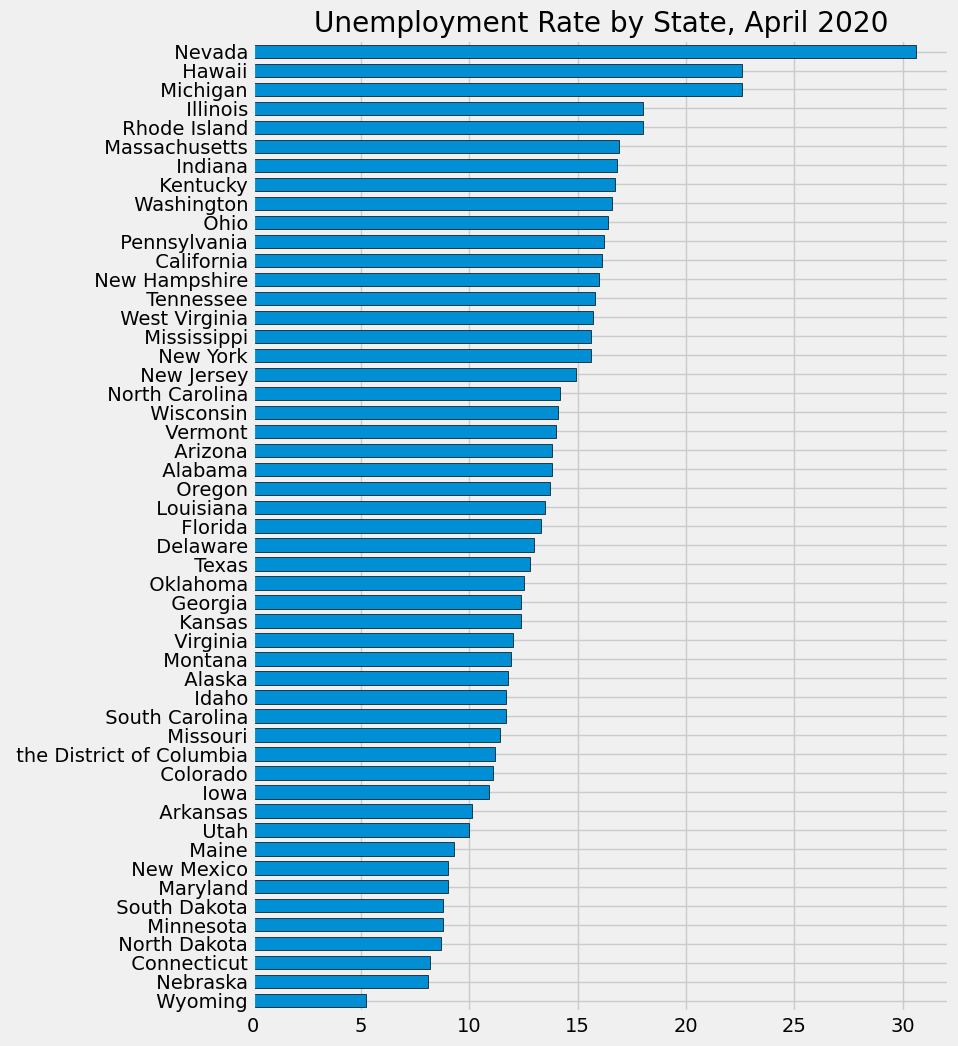

In [ ]:
ax = unem_results.loc[unem_results.index == '2020-04-01'].T \
.sort_values('2020-04-01') \
.plot(kind='barh', figsize=(8,12), width= 0.7, edgecolor='black', title='Unemployment Rate by State, April 2020')
ax.legend().remove()
plt.show()

In [ ]:
#Pull Participation Rate
part_df = fred.search('participation rate state', filter =('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['id'].str.startswith('LBS')]

In [ ]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2023-12-01,2023-12-01,Labor Force Participation Rate for California,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 09:01:03-06:00,20,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2023-12-01,2023-12-01,Labor Force Participation Rate for Alabama,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 09:01:07-06:00,13,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2023-12-01,2023-12-01,Labor Force Participation Rate for Florida,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 09:01:04-06:00,25,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2023-12-01,2023-12-01,Labor Force Participation Rate for Michigan,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 09:01:02-06:00,21,A state's labor-force participation rate is th...
LBSSA36,LBSSA36,2023-12-01,2023-12-01,Labor Force Participation Rate for New York,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 09:01:03-06:00,19,A state's labor-force participation rate is th...
LBSSA39,LBSSA39,2023-12-01,2023-12-01,Labor Force Participation Rate for Ohio,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 09:01:10-06:00,12,A state's labor-force participation rate is th...
LBSSA55,LBSSA55,2023-12-01,2023-12-01,Labor Force Participation Rate for Wisconsin,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 09:01:02-06:00,21,A state's labor-force participation rate is th...
LBSSA48,LBSSA48,2023-12-01,2023-12-01,Labor Force Participation Rate for Texas,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 09:01:06-06:00,19,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2023-12-01,2023-12-01,Labor Force Participation Rate for Kentucky,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 09:01:02-06:00,19,A state's labor-force participation rate is th...


In [ ]:
part_id_to_state= part_df['title'].str.replace('Labor Force Participation Rate for','').to_dict()
all_results = []

for myid in part_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [ ]:
part_states

,California,Alabama,Florida,Michigan,New York,Ohio,Wisconsin,Texas,Kentucky,Maryland,Georgia,Mississippi,Virginia,Colorado,West Virginia,Louisiana,Minnesota,Pennsylvania,New Mexico,Tennessee,Illinois,Maine,Utah,Massachusetts,Iowa,New Hampshire,Washington,South Carolina,Arizona,Connecticut,Oregon,Oklahoma,Nebraska,North Carolina,Indiana,Alaska,Nevada,Montana,New Jersey,Arkansas,Kansas,Idaho,North Dakota,South Dakota,Missouri,Hawaii,Vermont,Wyoming,Delaware,Rhode Island,District Of Columbia
1976-01-01,62.6,57.0,55.8,61.6,58.0,61.7,65.6,63.8,60.5,64.3,63.7,58.8,65.9,67.2,52.5,56.8,65.6,58.4,60.8,59.6,63.0,62.1,62.8,64.8,64.4,65.9,60.9,65.3,59.5,64.2,62.9,59.3,64.9,66.5,64.0,69.0,71.3,62.7,61.5,57.9,65.1,63.0,62.6,64.6,60.5,69.9,63.6,65.3,62.7,63.8,64.4
1976-02-01,62.4,56.9,55.7,61.5,58.0,61.7,65.5,63.5,60.3,64.2,63.6,58.6,65.8,67.0,52.4,56.6,65.5,58.3,60.5,59.4,63.0,61.9,62.6,64.7,64.3,65.6,60.7,65.2,59.2,64.1,62.7,59.2,64.9,66.3,63.9,68.4,70.8,62.5,61.4,57.8,65.0,62.8,62.4,64.4,60.3,69.6,63.4,64.9,62.5,63.7,64.5
1976-03-01,62.2,56.8,55.5,61.5,58.0,61.7,65.4,63.4,60.2,64.1,63.5,58.5,65.6,66.8,52.3,56.5,65.4,58.3,60.3,59.3,62.9,61.9,62.5,64.6,64.2,65.6,60.6,65.0,59.1,64.0,62.5,59.1,64.8,66.2,63.8,67.8,70.5,62.4,61.4,57.7,64.9,62.7,62.3,64.4,60.3,69.6,63.2,64.7,62.5,63.6,64.5
1976-04-01,62.2,56.8,55.5,61.6,58.0,61.6,65.4,63.5,60.1,64.1,63.5,58.5,65.5,66.6,52.3,56.4,65.4,58.3,60.3,59.3,62.9,61.8,62.5,64.6,64.1,65.7,60.6,64.9,59.1,64.1,62.4,59.0,64.8,66.2,63.8,67.9,70.4,62.3,61.5,57.7,65.0,62.7,62.5,64.3,60.4,69.4,63.5,64.9,62.4,63.7,64.5
1976-05-01,62.3,56.8,55.4,61.7,58.1,61.6,65.5,63.6,60.1,64.1,63.6,58.5,65.4,66.5,52.2,56.4,65.5,58.3,60.3,59.4,63.0,61.7,62.6,64.6,64.1,66.0,60.7,64.7,59.1,64.3,62.5,59.0,64.8,66.3,63.9,67.9,70.5,62.2,61.6,57.7,65.1,62.8,62.6,64.3,60.6,69.3,63.6,65.2,62.4,63.6,64.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,62.5,57.0,59.5,60.7,61.2,62.2,65.3,64.2,57.8,65.3,61.3,54.5,66.6,68.7,54.6,59.5,68.4,62.0,57.0,59.3,64.6,58.4,69.6,64.6,68.7,65.2,64.7,56.7,61.7,64.1,62.0,61.4,69.5,60.7,63.6,65.3,61.5,62.8,65.4,57.6,66.8,62.5,69.7,67.9,63.6,60.4,63.8,64.6,60.0,63.2,70.8
2023-07-01,62.4,57.0,59.7,61.0,61.4,62.1,65.5,64.2,57.7,65.3,61.4,54.4,66.7,68.7,54.7,59.3,68.5,61.9,57.1,59.4,64.4,58.5,69.8,64.5,68.8,64.9,64.7,56.9,61.8,64.1,61.8,61.6,69.4,60.7,63.6,65.2,61.6,62.7,65.5,57.7,66.8,62.4,69.7,67.8,63.6,60.3,63.9,64.6,60.1,63.3,70.8
2023-08-01,62.4,57.0,59.7,61.3,61.5,62.1,65.7,64.2,57.6,65.3,61.4,54.3,66.7,68.7,54.9,59.0,68.5,61.9,57.2,59.4,64.4,58.6,69.8,64.5,68.7,64.6,64.6,57.0,61.8,64.1,61.7,61.8,69.2,60.8,63.5,65.2,61.7,62.7,65.5,57.7,66.7,62.4,69.5,67.8,63.7,60.2,64.0,64.5,60.3,63.3,70.9
2023-09-01,62.3,57.0,59.8,61.6,61.6,62.1,65.8,64.2,57.4,65.2,61.5,54.1,66.8,68.6,55.1,58.9,68.5,61.9,57.2,59.4,64.5,58.7,69.7,64.4,68.6,64.6,64.5,57.0,61.9,64.1,61.7,62.1,69.2,60.9,63.4,65.2,61.9,62.6,65.4,57.8,66.7,62.4,69.3,67.8,63.7,60.2,64.1,64.4,60.5,63.4,71.1


In [ ]:
#Plot Unemployment vs Participation

In [ ]:
# Fix DC
unem_results = unem_results.rename(columns={' the District of Columbia':'District Of Columbia'})

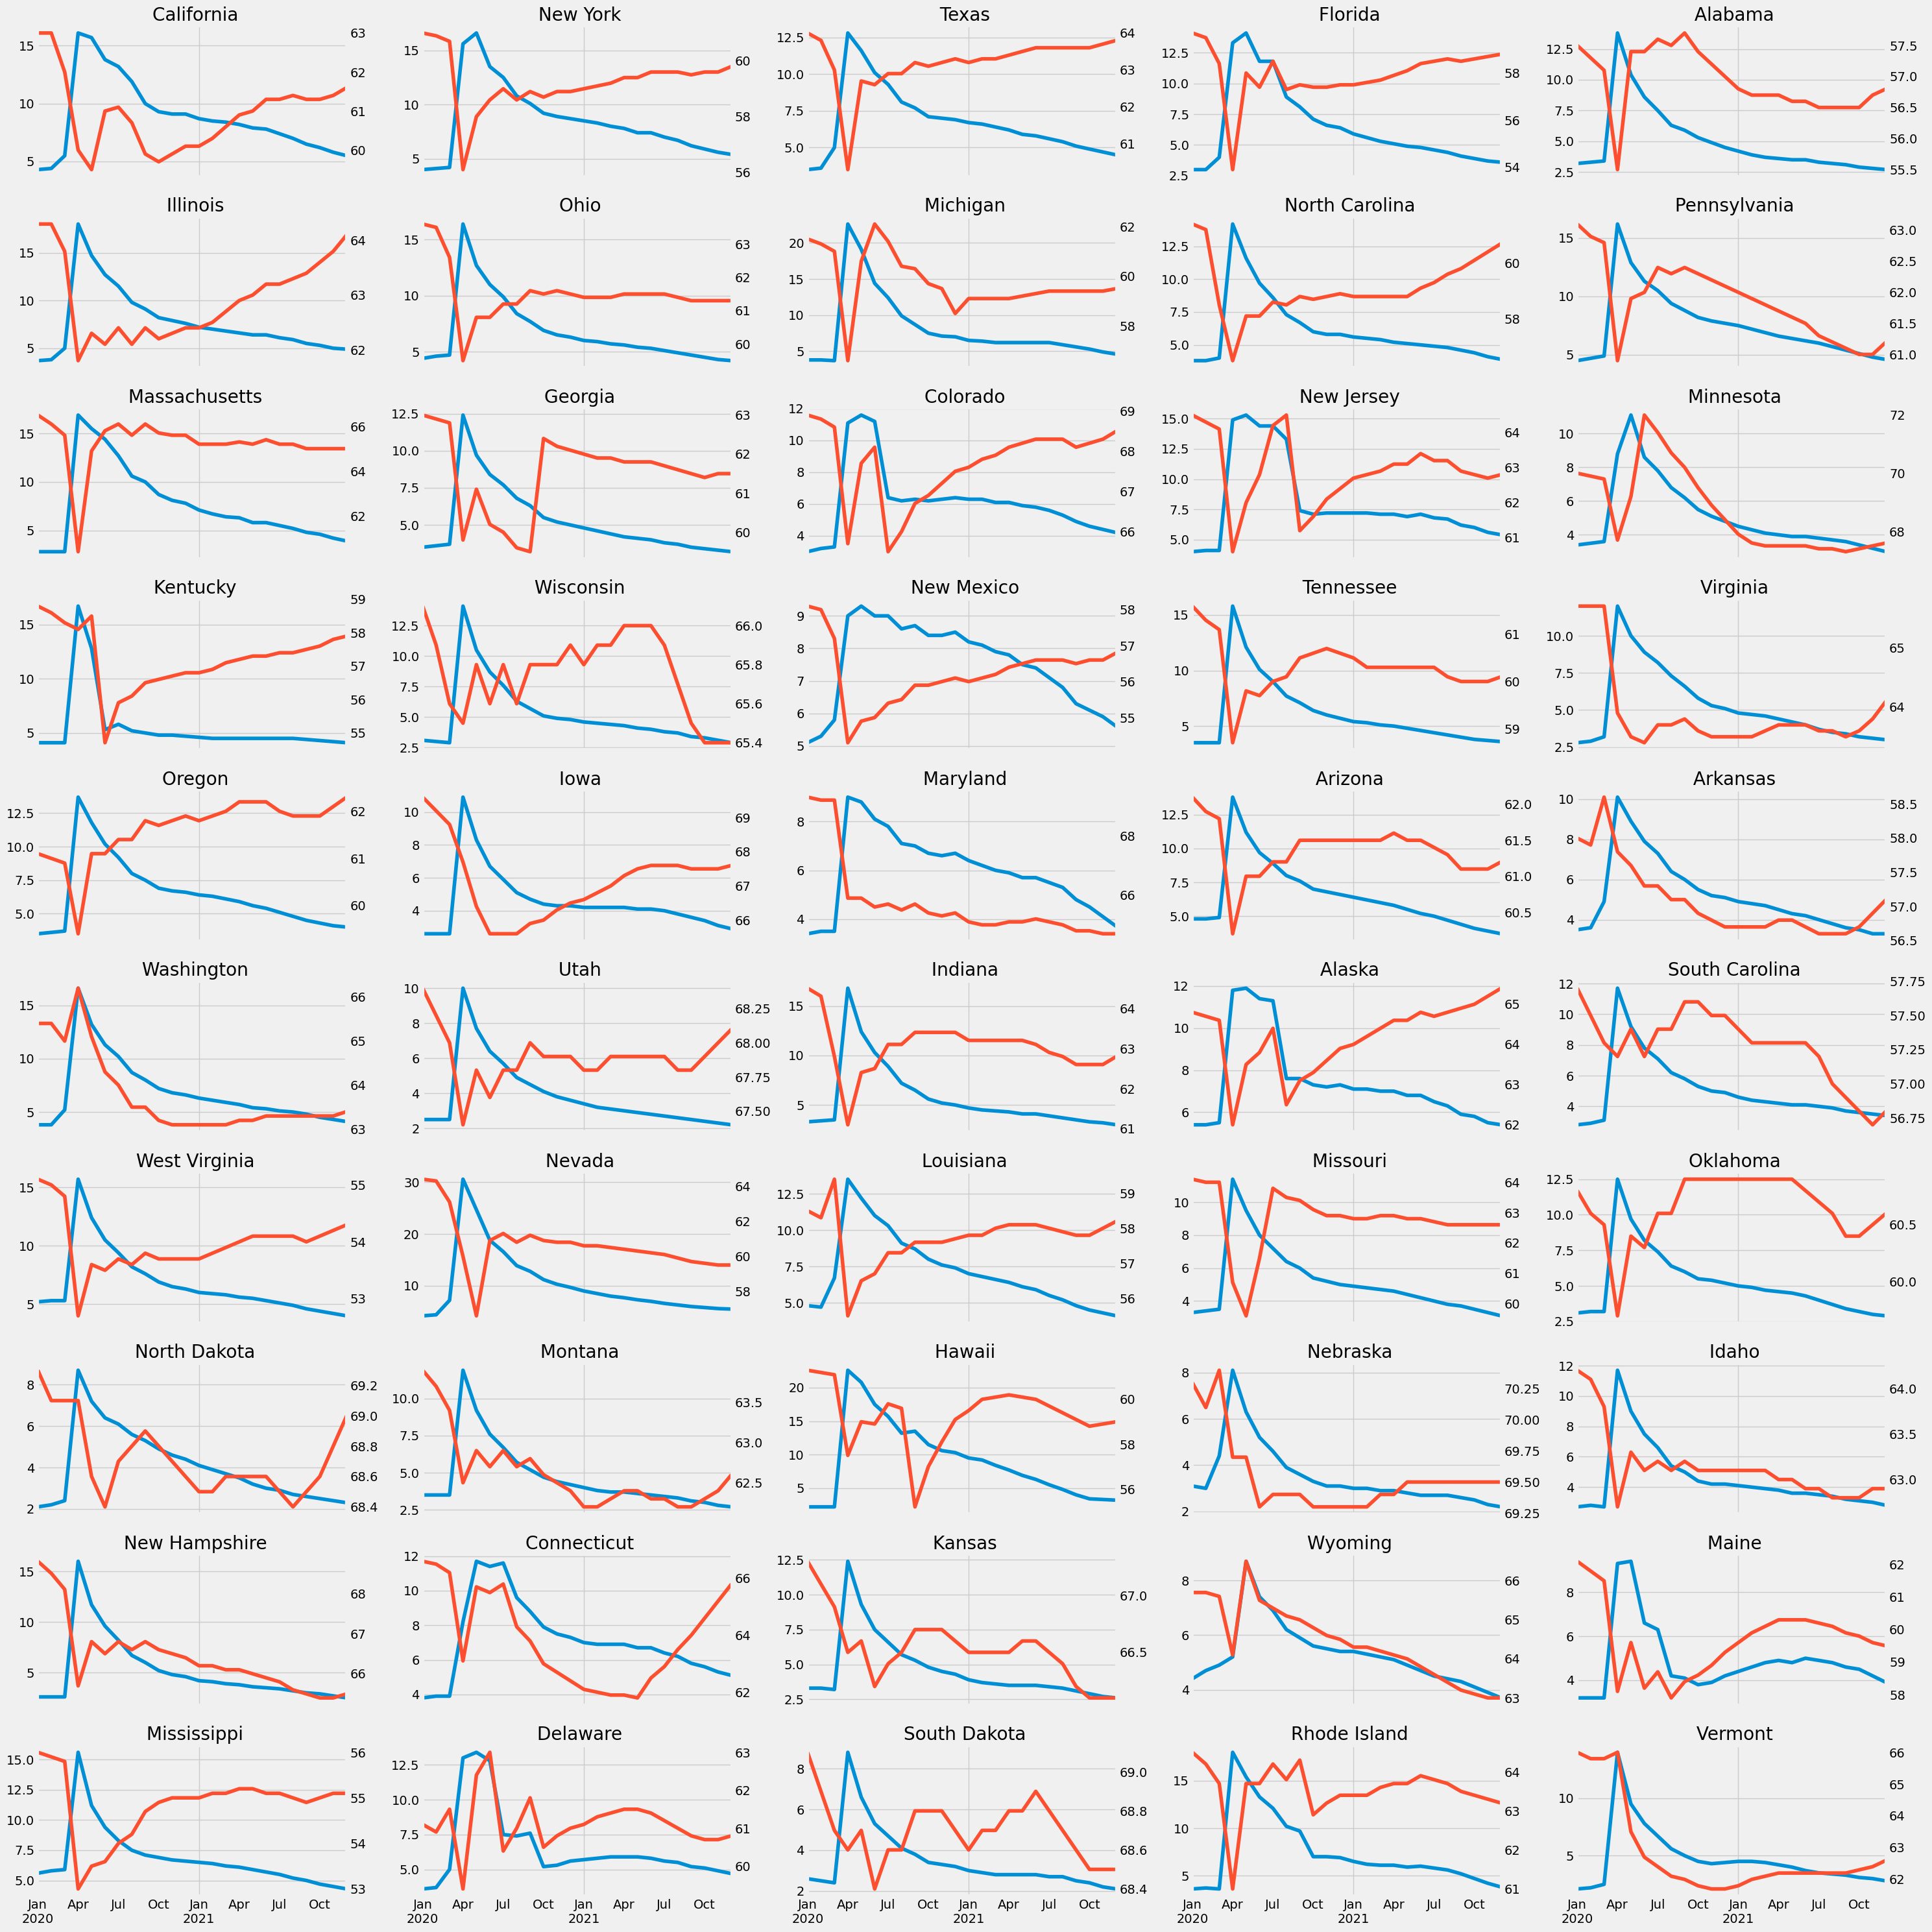

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unem_results.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    unem_results.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()